# Foundations of Computational Economics #25

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Newton-Raphson method with bounds

<img src="_static/img/lab.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/1fD-BSiO1f4](https://youtu.be/1fD-BSiO1f4)

Description: Robust implementation of Newton method for problems with strict bounds.

- example of how elements of different methods can be combined
  in a poly-algorithm  
- deeper merge than a multi-stage poly-algorithm we mentioned before, such as
  1. Robust slow method for initial search of parameter space
  2. Fast accurate method invoked from a very good starting values  

### Example

Solve the following equation

$$
f(x) = a \log(x) + b \log(1-x) + c = 0, \; ab<0
$$

This equation arises in the models of discrete choice in IO, for example when computing a mixed
strategy equilibrium in a two players game with binary actions.

### Theoretical properties and numerical difficulties

- $ x \in (0,1) $ are strict limits, any algorithm will break down if stepping outside  
- there is exactly one solution for any values of parameters $ a,b,c $ (where $ a $ and $ b $ have opposite signs, without loss of generality assume $ a>0 $ and $ b<0 $)
  - $ f(x) $ is continuous in its domain $ x \in (0,1) $
  - $ f'(x) \ge 0 $ everywhere in the domain, so the function is monotonically increasing, and vise versa
  - when $ x \rightarrow 0 $ from the right $ f(x) \rightarrow -\infty $, and when $ x \rightarrow 1 $ from the left $ f(x) \rightarrow \infty $, and vise versa  
- but depending on the value of $ c $ the solution may be arbitrary close to 0 or 1!  

- Newton — can easily overshoot to the outside of domain  
- bisections — may take forever to converge  
- successive approximations — ?  

### Newton-bisection hybrid algorithm

1. Initialize with interval $ (a,b) $ such that the function
  has opposite signs at the ends, and starting value $ x_0 $  
1. Compute the Newton step and check if it remains within the bounds  
1. If yes, make Newton step and continue to next iteration  
1. If not, make a bisection step and continue to next iteration  
1. Iterate until convergence, or until maximum number of iterations is exceeded  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
np.seterr(all=None, divide='ignore', over=None, under=None, invalid='ignore')  # turn off log(0) warning

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# code up the function
# make a plot of the function
# code up the solver

In [3]:
#















# solution below















#

In [1]:
def newton_bounds(fun,grad,x0=None,bounds=(0,1),
                  tol=1e-6,maxiter=100,callback=None):
    '''Polyalgorithm that combines bisections and Newton-Raphson
       to solve fun(x)=0 within given lower and upper bounds.
       Callback function is invoked at each iteration if given.
    '''
    a,b = bounds
    sa,sb = np.sign(fun(a)),np.sign(fun(b))  # a and b signs, never change
    if sa*sb > 0:
        raise(ValueError('Function has the same signs at the initial lower and upper limits'))
    x0 = (a+b)/2 if x0==None else x0  # midpoint is default x0
    for i in range(maxiter):
        f0 = fun(x0)
        newt = x0 - f0/grad(x0) # Newton step
        if not a < newt < b:
            a,b = (x0,b) if np.sign(f0)*sa > 0 else (a,x0)  # update limits
            x1 = (a+b)/2  # bisections step
            step_type = 'bisection'
        else:
            x1 = newt
            step_type = 'newton'
        err = np.abs(x0-x1)  # save error for both steps
        if callback:
            callback(iter=i,type=step_type,err=err,x0=x0,x1=x1,bounds=(a,b))
        if err < tol:
            break
        x0 = x1
    else:
        raise(RuntimeError('Failed to converge in %d iterations'%maxiter))
    return x1

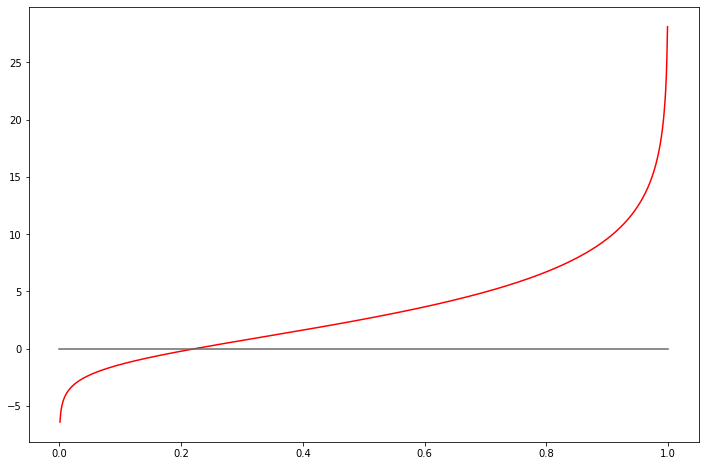

x0 = 0.5
iter=0   newton     x=0.24205584583201645     err=2.5794e-01   bounds=(0, 1)
iter=1   newton     x=0.22186227635177588     err=2.0194e-02   bounds=(0, 1)
iter=2   newton     x=0.22209978959601762     err=2.3751e-04   bounds=(0, 1)
iter=3   newton     x=0.222099829644735       err=4.0049e-08   bounds=(0, 1)
Converged in 4 iterations, x* = 0.2220998296447350


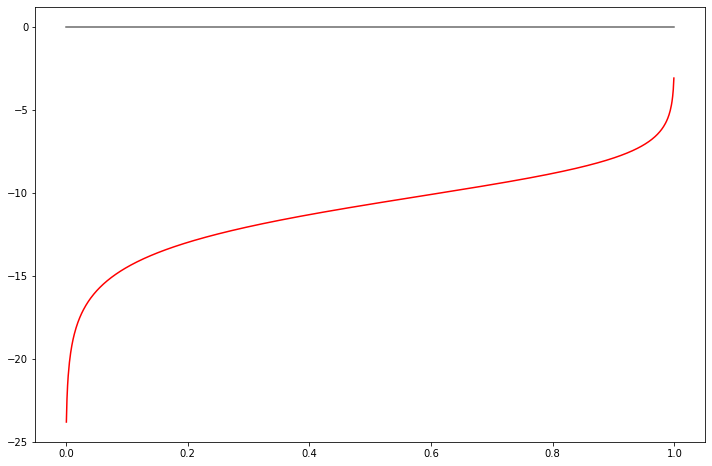

x0 = 0.5
iter=0   bisection  x=0.75                    err=2.5000e-01   bounds=(0.5, 1)
iter=1   bisection  x=0.875                   err=1.2500e-01   bounds=(0.75, 1)
iter=2   bisection  x=0.9375                  err=6.2500e-02   bounds=(0.875, 1)
iter=3   bisection  x=0.96875                 err=3.1250e-02   bounds=(0.9375, 1)
iter=4   bisection  x=0.984375                err=1.5625e-02   bounds=(0.96875, 1)
iter=5   bisection  x=0.9921875               err=7.8125e-03   bounds=(0.984375, 1)
iter=6   bisection  x=0.99609375              err=3.9062e-03   bounds=(0.9921875, 1)
iter=7   bisection  x=0.998046875             err=1.9531e-03   bounds=(0.99609375, 1)
iter=8   bisection  x=0.9990234375            err=9.7656e-04   bounds=(0.998046875, 1)
iter=9   bisection  x=0.99951171875           err=4.8828e-04   bounds=(0.9990234375, 1)
iter=10  bisection  x=0.999755859375          err=2.4414e-04   bounds=(0.99951171875, 1)
iter=11  bisection  x=0.9998779296875         err=1.2207e-04   boun

In [5]:
def run(a,b,c,plot=False,**kwargs):
    '''Solves the equation with illustrations'''
    assert a*b<0, 'Must have different signs on a and b by the conditions of the problem'
    f = lambda x: a*np.log(x) + b*np.log(1-x) + c
    g = lambda x: a/x - b/(1-x)
    # plot
    if plot:
        xd = np.linspace(0,1,1000)
        plt.plot(xd,f(xd),c='r')
        plt.plot([0,1],[0,0],c='dimgrey')
        plt.show()
    def printiter (**kwargs):
        printiter.cout += 1
        iter = kwargs['iter']
        type = kwargs['type']
        x = kwargs['x1']
        bounds = kwargs['bounds']
        err = kwargs['err']
        if iter == 0:
            print('x0 = {}'.format(kwargs['x0']))
        print('iter={:<3d} {:<9s}  x={:<23} err={:1.4e}   bounds={:}'.format(iter,type,x,err,bounds))
    printiter.cout = 0
    xs = newton_bounds(f,g,bounds=(0,1),callback=printiter,**kwargs)
    print('Converged in %d iterations, x* = %1.16f' % (printiter.cout,xs))

run(1,-4,0.5,plot=True)
run(2,-1,-10,plot=True)
run(2,-3,1e25)
run(1,-1,-5,x0=.9,tol=1e-15)

#### Further learning resources

- Oscar Veliz video on Newton-bisections hybrid (more general)
  [https://www.youtube.com/watch?v=FD3BPTMGJds&t=335s](https://www.youtube.com/watch?v=FD3BPTMGJds&t=335s)  